# Please Try To Run Each Cell Separately

# Code for Creating Histograms

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('S32_T2_t12.csv')
data = data[['Unnamed: 0', 'x', 'y', 'z', 'num_of_neighbor_lesions']]
data.columns = ['lesion_id', 'x', 'y', 'z', 'num_of_neighbor_lesions']

data['component_id'] = 0
data['label_id'] = ''
data = data[data['num_of_neighbor_lesions'] > 9]
data.loc[data['num_of_neighbor_lesions'].between(10, 12), 'label_id'] = 1
data.loc[data['num_of_neighbor_lesions'].between(13, 20), 'label_id'] = 2
data.loc[data['num_of_neighbor_lesions'].between(21, 26), 'label_id'] = 3

def label_components(lesion_id, component_id):
    if data.loc[lesion_id]['component_id'] == 0:
        data.loc[data['lesion_id'] == lesion_id, 'component_id'] = component_id
        lesion = data.loc[lesion_id]
        for neighbor_lesion_id in data[(data['x'].between(lesion['x']-1, lesion['x']+1)) & (data['y'].between(lesion['y']-1, lesion['y']+1)) & (data['z'].between(lesion['z']-1, lesion['z']+1))].index:
            label_components(neighbor_lesion_id, component_id)
            
component_id = 1
for lesion_id in data[data['num_of_neighbor_lesions'] == 26].index:
    if data.loc[lesion_id]['component_id'] == 0:
        label_components(lesion_id, component_id)
        component_id += 1
        
print('List of components:', set(data['component_id']))

List of components: {0}


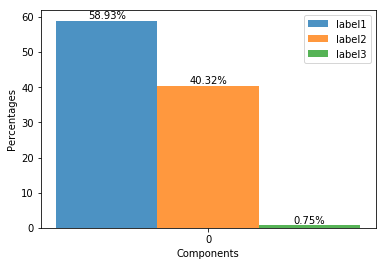

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

num_of_components = np.array(list(set(data['component_id'])))
percentages = np.zeros((3, len(num_of_components)))

# iterate over components
for i in num_of_components:
    sum_of_lesion_in_component_i = data[data['component_id'] == i].shape[0]
    #iterate over 3 labels
    for j in range(1, 4):
        sum_of_lesion_in_label_i = data[(data['component_id'] == i) & (data['label_id'] == j)].shape[0]
        percentages[j - 1, i] = round((sum_of_lesion_in_label_i/sum_of_lesion_in_component_i) * 100, 2)

bar_width = 0.3

fig, ax = plt.subplots()
        
for i in range(3):
    rects = plt.bar(num_of_components, percentages[i], bar_width, label='label'+str(i+1), alpha=.8)
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., h, str(h) + '%', ha='center', va='bottom')
    num_of_components = np.add(num_of_components, bar_width)

plt.ylabel('Percentages')
plt.xlabel('Components')
#plt.xticks(num_of_components - (2*bar_width), ['C' + str(x) for x in range(len(num_of_components))])
plt.xticks(num_of_components - (2*bar_width), range(len(num_of_components)))
    
plt.legend()
plt.show()
#percentages

# schema of percentages array is columns are components (1 to n) and rows are labels (1 to 3)

# View 3D-Plot on Jupyter Notebook (plots are rotateable)

<IPython.core.display.Javascript object>


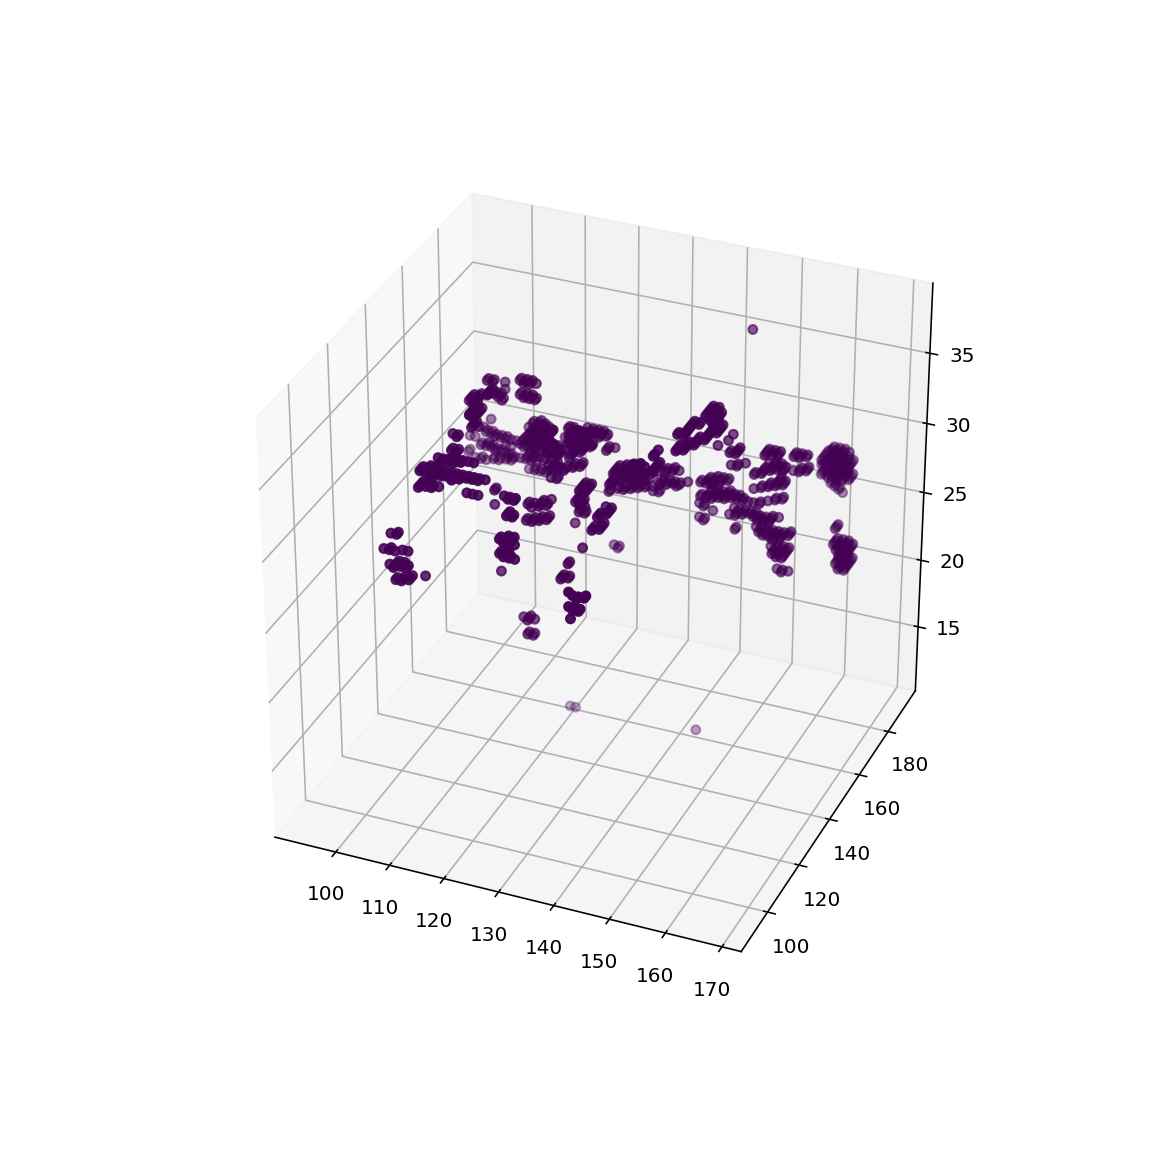

In [5]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(data['x'], data['y'], data['z'], c=data['component_id'])
plt.show()

#plt.clf()
#plt.cla()
#plt.close()

# Generating a Nifti file from np.array

In [4]:
import os
import nibabel as nib

img_arr = np.zeros((512, 512, 512), dtype=np.int16)
for row in data.iterrows():
    img_arr[row[1]['x'],row[1]['y'],row[1]['z']] = 1

affine = np.array(
    [[-0.5,  0. ,  0. , -0. ],
    [ 0. , -0.5,  0. , -0. ],
    [ 0. ,  0. ,  0.5,  0. ],
    [ 0. ,  0. ,  0. ,  1. ]])

img = nib.Nifti1Image(img_arr, affine=affine)
nib.save(img, os.path.join('generated.nii.gz'))

/Users/bissenbay/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
